# Mask and compare data
Mask the regions of interest and compare between audio and visual stimuli. We will focus on voxels with a <b>95% threshold</b> which extracts the top 5% of brain activity in a given ROI.

In [5]:
# import dependencies
import numpy as np
from nilearn import image as nli
import nibabel as nib
import os
from nilearn import plotting

# load processed data from preprocessing
clean_data_audio = nib.load('../results/audio/cleaned_data_audio.nii.gz')
clean_data_visual = nib.load('../results/visual/cleaned_data_visual.nii.gz')

/var/folders/t4/kq2w5sp97l11x3ky8lqjsf800000gn/T/ipykernel_52706/600092489.py:6: UserWarning: The given float value must not exceed 2.6018882635980844e-05. But, you have given threshold=0.95.
  thr_audio = nli.threshold_img(mean_audio, threshold=0.95)
/var/folders/t4/kq2w5sp97l11x3ky8lqjsf800000gn/T/ipykernel_52706/600092489.py:7: UserWarning: The given float value must not exceed 3.73113865722329e-05. But, you have given threshold=0.95.
  thr_visual = nli.threshold_img(mean_visual, threshold=0.95)
/Users/jaslavie/Desktop/attention/venv/lib/python3.11/site-packages/nilearn/plotting/html_stat_map.py:202: UserWarning: The given float value must not exceed 0.0. But, you have given threshold=1e-06.
  data, mask, threshold = _threshold_data(data, threshold)
/Users/jaslavie/Desktop/attention/venv/lib/python3.11/site-packages/nilearn/plotting/html_stat_map.py:584: UserWarning: The given float value must not exceed 0.0. But, you have given threshold=1e-06.
  colors = colorscale(
/Users/jaslavi


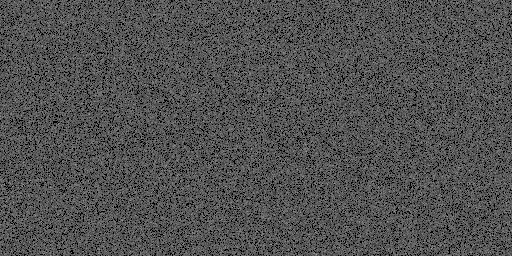
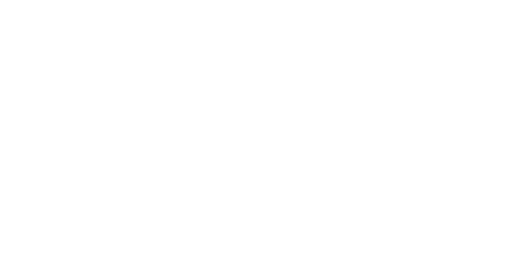

In [9]:
# Create mean images to translate 4D to 3D images
mean_audio = nli.mean_img(clean_data_audio)
mean_visual = nli.mean_img(clean_data_visual)

# Mask images (keep only the voxels with an activation threshold over 95%)
thr_audio = nli.threshold_img(mean_audio, threshold=0.95)
thr_visual = nli.threshold_img(mean_visual, threshold=0.95)

# save the masked images
nib.save(thr_audio, '../results/audio/masked_data_audio.nii.gz')
plotting.view_img(thr_audio, bg_img = mean_audio)
nib.save(thr_visual, '../results/visual/masked_data_visual.nii.gz')
plotting.view_img(thr_visual, bg_img = mean_visual)